In [77]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.linalg as la
from scipy.linalg import inv
import sklearn.metrics
import random
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import StratifiedKFold  , RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from matplotlib.pyplot import figure

In [3]:
col_names=['t','A']

In [4]:
#filename='I124.prn'
I124 = pd.read_csv('I124.prn',header=None, delim_whitespace=True, names=col_names)
I4529 = pd.read_csv('I4529.prn',header=None, delim_whitespace=True, names=col_names)
RB122 = pd.read_csv('RB122.prn',header=None, delim_whitespace=True, names=col_names)

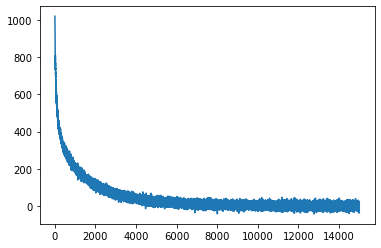

In [5]:
plt.plot(I124['t'],I124['A'])

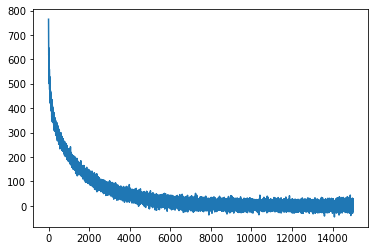

In [6]:
plt.plot(I4529['t'],I4529['A'])

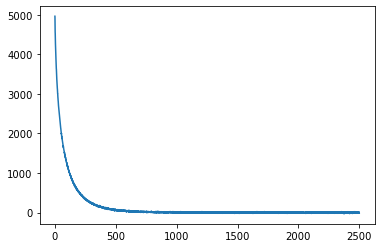

In [7]:
plt.plot(RB122['t'],RB122['A'])

In [8]:
I124

,t,A
0,0.5,1020.156466
1,1.0,1013.586268
2,1.5,1001.464677
3,2.0,999.287867
4,2.5,943.045233
...,...,...
29995,14998.0,-10.969489
29996,14998.5,4.657891
29997,14999.0,17.013071
29998,14999.5,-29.296794


In [9]:
I4529

,t,A
0,0.5,764.486998
1,1.0,756.074783
2,1.5,732.980731
3,2.0,737.813449
4,2.5,747.133972
...,...,...
29995,14998.0,4.674915
29996,14998.5,29.701928
29997,14999.0,8.016949
29998,14999.5,-15.133918


In [10]:
RB122

,t,A
0,0.5,4960.997216
1,1.0,4917.876253
2,1.5,4733.957282
3,2.0,4712.508763
4,2.5,4557.186705
...,...,...
4995,2498.0,2.708877
4996,2498.5,-9.472115
4997,2499.0,0.548544
4998,2499.5,4.934563


In [11]:
T2=np.logspace(-1,3,56)

In [12]:
def X_itoe(t,T2):
    return(np.exp(-t/T2))

In [13]:
def best_model_chooser(results):
    return max(results, key=lambda x: x[1])[0]

In [14]:
methods = [
    LinearRegression(positive=True), 
    Ridge(max_iter=3000, positive=True), 
    Lasso(max_iter=3000, positive=True)
]
parameters = {
    'LR': {},
    'Ridge': {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10]},
    'Lasso': {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10]}
    }

### И124

In [15]:
Am=I124['A'].to_numpy().reshape(-1,1)

In [16]:
time=I124['t'].to_numpy().reshape(-1,1)/1000

In [17]:
Mat=X_itoe(time,T2)

In [18]:
grid_result_i_124 = []
for est, par in zip(methods, parameters.keys()):
    model = GridSearchCV(est, parameters[par]).fit(
        X_itoe(time, T2), Am
    )
    grid_result_i_124.append((model.best_estimator_, model.best_score_))

C:\Users\admin\nns\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.684e+04, tolerance: 8.788e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\nns\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.657e+06, tolerance: 2.819e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\nns\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.670e+06, tolerance: 2.727e+04
  mod

In [19]:
grid_result_i_124

[(LinearRegression(positive=True), 0.2713274241596001),
 (Ridge(alpha=1, max_iter=3000, positive=True), 0.07274080984861744),
 (Lasso(alpha=1e-05, max_iter=3000, positive=True), 0.26802959583187014)]

In [20]:
best_model_i_124 = best_model_chooser(grid_result_i_124)

In [21]:
best_model_i_124

LinearRegression(positive=True)

Text(0.5, 1.0, 'Зарегистрированная релаксационная кривая')

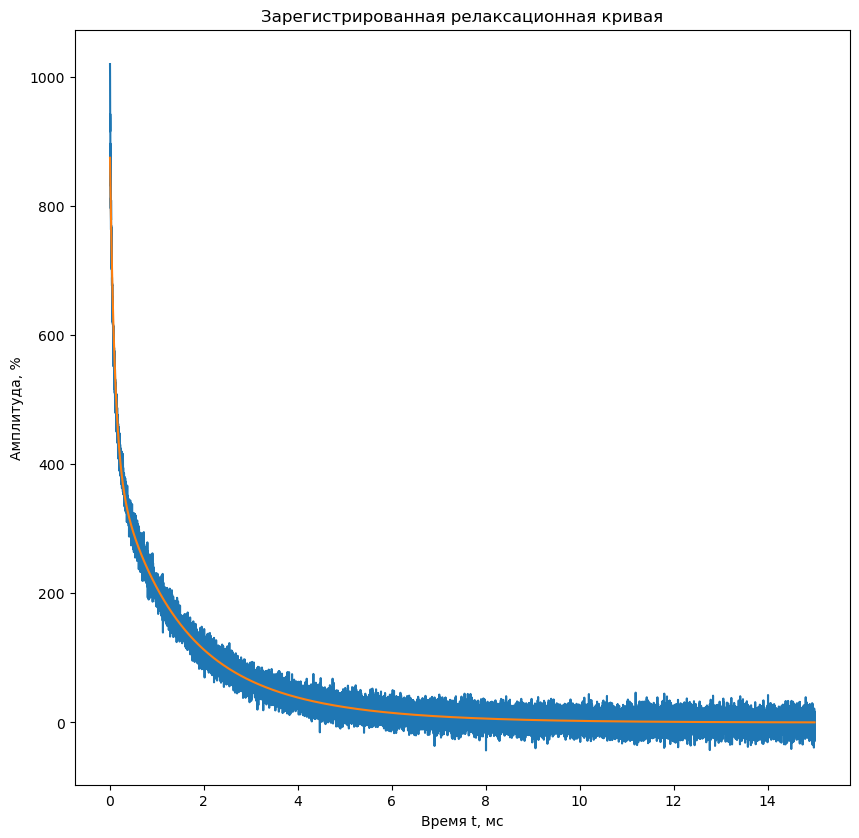

In [22]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
ax.plot(time,Am)
ax.plot(
    time, 
    best_model_i_124.predict(X_itoe(time, T2))
)
ax.set_xlabel('Время t, мс')
ax.set_ylabel('Амплитуда, %')
ax.set_title('Зарегистрированная релаксационная кривая')

## Смотрим модели на графике

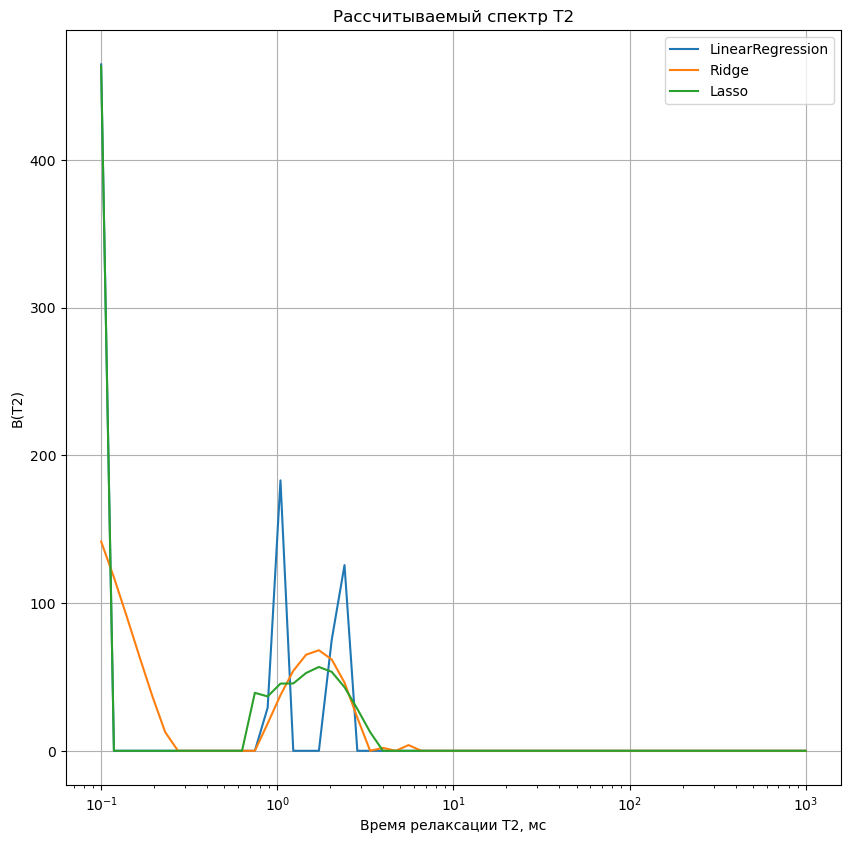

In [23]:
fig1, ax1 = plt.subplots(figsize=(10, 10), dpi=100)
for model in grid_result_i_124:
    l, = ax1.plot(T2, model[0].coef_.reshape(-1))
    l.set_label(str(model[0]).split('(')[0])
ax1.semilogx()
ax1.set_xlabel('Время релаксации T2, мс')
ax1.set_ylabel('B(T2)')
ax1.set_title('Рассчитываемый спектр T2')
ax1.legend()
ax1.grid()

### И4529

In [62]:
Am=I4529['A'].to_numpy().reshape(-1,1)


In [63]:
time=I4529['t'].to_numpy().reshape(-1,1)/1000

In [64]:
Mat=X_itoe(time,T2)

In [65]:
grid_result_I4529 = []
for est, par in zip(methods, parameters.keys()):
    model = GridSearchCV(est, parameters[par]).fit(
        X_itoe(time, T2), Am
    )
    grid_result_I4529.append((model.best_estimator_, model.best_score_))

C:\Users\admin\nns\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.289e+05, tolerance: 9.349e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\nns\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.410e+06, tolerance: 2.265e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\nns\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.426e+06, tolerance: 2.177e+04
  mod

In [66]:
grid_result_I4529

[(LinearRegression(positive=True), -8.290568371751727e+17),
 (Ridge(alpha=5, max_iter=3000, positive=True), 0.09461107385937875),
 (Lasso(alpha=1e-05, max_iter=3000, positive=True), 0.3054244819604637)]

In [67]:
best_model_I4529 = best_model_chooser(grid_result_I4529)
best_model_I4529

Lasso(alpha=1e-05, max_iter=3000, positive=True)

Text(0.5, 1.0, 'Зарегистрированная релаксационная кривая')

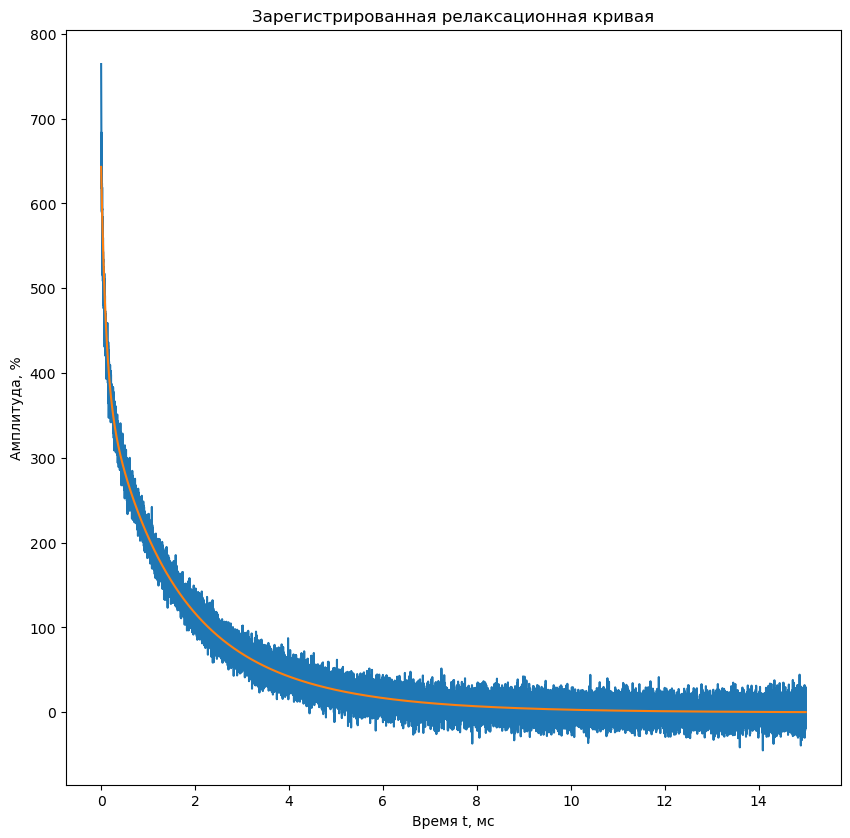

In [68]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
ax.plot(time,Am)
ax.plot(
    time, 
    best_model_I4529.predict(X_itoe(time, T2))
)
ax.set_xlabel('Время t, мс')
ax.set_ylabel('Амплитуда, %')
ax.set_title('Зарегистрированная релаксационная кривая')

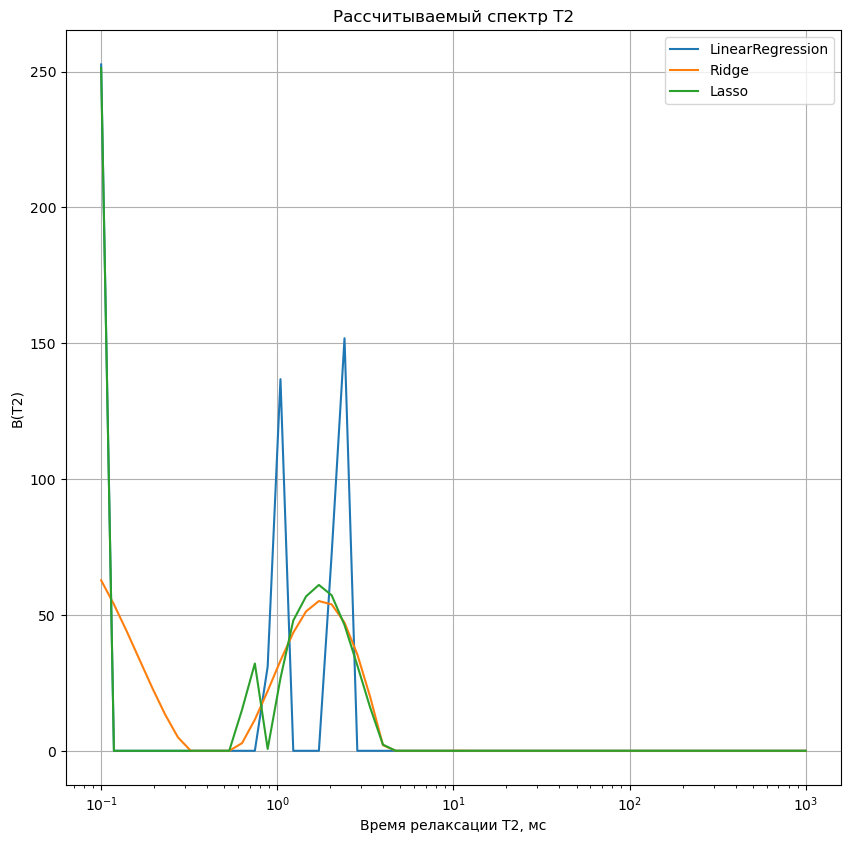

In [69]:
fig1, ax1 = plt.subplots(figsize=(10, 10), dpi=100)
for model in grid_result_I4529:
    l, = ax1.plot(T2, model[0].coef_.reshape(-1))
    l.set_label(str(model[0]).split('(')[0])
ax1.semilogx()
ax1.set_xlabel('Время релаксации T2, мс')
ax1.set_ylabel('B(T2)')
ax1.set_title('Рассчитываемый спектр T2')
ax1.legend()
ax1.grid()

### РБ122 

Линейная регрессия

In [70]:
Am=RB122['A'].to_numpy().reshape(-1,1)

In [71]:
time=RB122['t'].to_numpy().reshape(-1,1)/1000

In [72]:
grid_result_RB122 = []
for est, par in zip(methods, parameters.keys()):
    model = GridSearchCV(est, parameters[par]).fit(
        X_itoe(time, T2), Am
    )
    grid_result_RB122.append((model.best_estimator_, model.best_score_))

C:\Users\admin\nns\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.423e+03, tolerance: 8.588e+01
  model = cd_fast.enet_coordinate_descent(


In [73]:
grid_result_RB122

[(LinearRegression(positive=True), -0.037675066348112504),
 (Ridge(alpha=0.01, max_iter=3000, positive=True), -0.23415429628615742),
 (Lasso(alpha=1e-05, max_iter=3000, positive=True), -0.07353304697308023)]

In [74]:
best_model_RB122 = best_model_chooser(grid_result_RB122)
best_model_RB122

LinearRegression(positive=True)

Text(0.5, 1.0, 'Зарегистрированная релаксационная кривая')

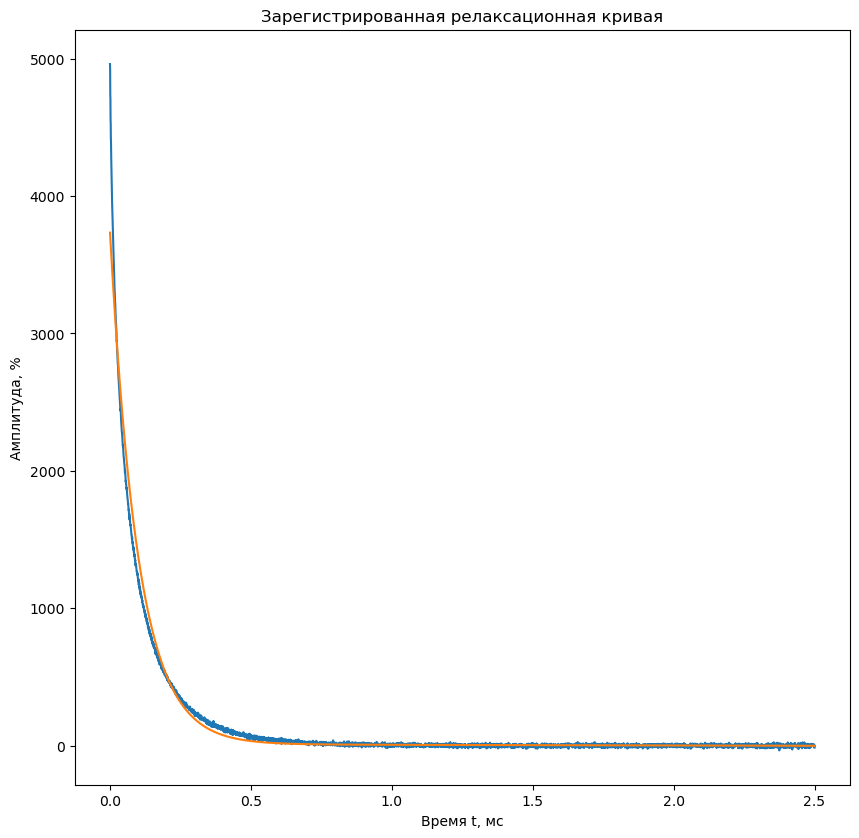

In [75]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
ax.plot(time,Am)
ax.plot(
    time, 
    best_model_RB122.predict(X_itoe(time, T2))
)
ax.set_xlabel('Время t, мс')
ax.set_ylabel('Амплитуда, %')
ax.set_title('Зарегистрированная релаксационная кривая')

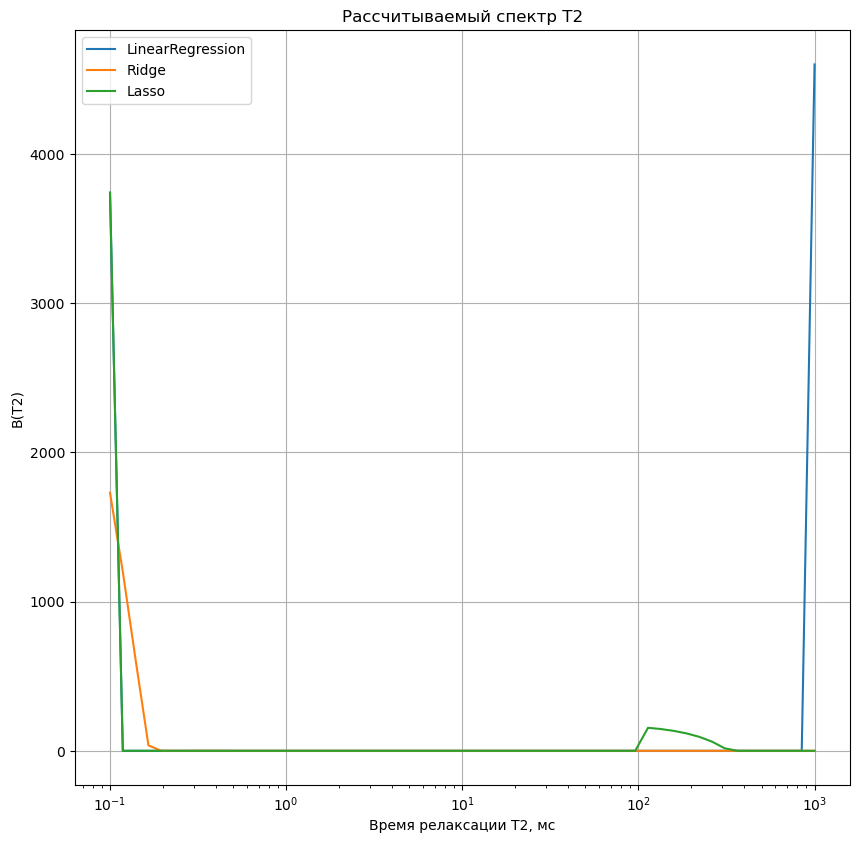

In [76]:
fig1, ax1 = plt.subplots(figsize=(10, 10), dpi=100)
for model in grid_result_RB122:
    l, = ax1.plot(T2, model[0].coef_.reshape(-1))
    l.set_label(str(model[0]).split('(')[0])
ax1.semilogx()
ax1.set_xlabel('Время релаксации T2, мс')
ax1.set_ylabel('B(T2)')
ax1.set_title('Рассчитываемый спектр T2')
ax1.legend()
ax1.grid()